<h1> Importing Python libraries </h1>

In [ ]:
!pip install pyLDAvis

<h1> Importing Stopwords for removing unneccesary words, Wordnet for Wordcloud, and Image Color Generator for graphs!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import plotly.express as px
import re
from wordcloud import WordCloud
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install pandas==1.3.0

<h1> Preparing data and storing in dataframe! </h1>


In [ ]:
df = pd.read_csv('Twitterabuse.csv')

In [ ]:
df.head()

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/martyps/status/14766877858...,2021-12-30 22:52:58+00:00,@TrakkyD @NSWHealth abuse was hurled at scient...,@TrakkyD @NSWHealth abuse was hurled at scient...,1476687785872420864,"{'username': 'martyps', 'id': 17335098, 'displ...",0,0,0,0,1476674512187846665,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.476685e+18,"{'username': 'TrakkyD', 'id': 1137233693548748...","[{'username': 'TrakkyD', 'id': 113723369354874...","{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",NaN,NaN
1,1,https://twitter.com/AlliC19/status/14766814294...,2021-12-30 22:27:42+00:00,@crakeka1 It is interesting as many attack oth...,@crakeka1 It is interesting as many attack oth...,1476681429400449034,"{'username': 'AlliC19', 'id': 1903049988, 'dis...",1,0,1,0,1476676731851329536,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.476677e+18,"{'username': 'crakeka1', 'id': 2723185873, 'di...","[{'username': 'crakeka1', 'id': 2723185873, 'd...","{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",NaN,NaN
2,2,https://twitter.com/mikjcal/status/14766793839...,2021-12-30 22:19:35+00:00,@chadfelixg No wonder LGBTQ would feel mentall...,@chadfelixg No wonder LGBTQ would feel mentall...,1476679383964217352,"{'username': 'mikjcal', 'id': 8096509038001561...",0,0,1,0,1476676718610030598,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.476677e+18,"{'username': 'chadfelixg', 'id': 17626317, 'di...","[{'username': 'chadfelixg', 'id': 17626317, 'd...","{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",NaN,NaN
3,3,https://twitter.com/AweCentiQue/status/1476483...,2021-12-30 09:20:47+00:00,@thesayno7 @Anne_Ruston @JElliotMP @JulianHill...,@thesayno7 @Anne_Ruston @JElliotMP @JulianHill...,1476483394041090051,"{'username': 'AweCentiQue', 'id': 140039824775...",0,1,1,0,1450303683481116680,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.450824e+18,"{'username': 'thesayno7', 'id': 11853666428694...","[{'username': 'thesayno7', 'id': 1185366642869...","{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '...",NaN,NaN
4,4,https://twitter.com/Kuvlotik/status/1476424899...,2021-12-30 05:28:21+00:00,@marie19705 @ScottMorrisonMP 2/\ndivides inste...,@marie19705 @ScottMorrisonMP 2/\ndivides inste...,1476424899249926145,"{'username': 'Kuvlotik', 'id': 93730228, 'disp...",1,0,1,0,1476116833002409984,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.476422e+18,"{'username': 'Kuvlotik', 'id': 93730228, 'disp...","[{'username': 'marie19705', 'id': 48946651, 'd...","{'longitude': 151.468376, 'latitude': -30.6589...","{'fullName': 'Uralla, New South Wales', 'name'...",NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

converting content to list


In [ ]:
content = df['renderedContent'].tolist()

In [ ]:
content

['@TrakkyD @NSWHealth abuse was hurled at scientists much more knowledgeable than the people who abused them',
 '@crakeka1 It is interesting as many attack other politicians in far worse terms yet most are not appalled by the attacks and actually participate in the abuse. People are often very selective in who it is acceptable to abuse and those that or not on Twitter. So many double standards',
 '@chadfelixg No wonder LGBTQ would feel mentally fuked when all you’re fed is that you are hated, worthless and oppressed. \n\nInteresting Glaad say LGBTQ disproportionately experience hate and harassment online. In my experience its always been other LGBTQ dishing the most abuse to their own🤷🏻\u200d♀️',
 "@thesayno7 @Anne_Ruston @JElliotMP @JulianHillMP @Anne_Ruston immoral acts, claims of sexual assaults, infidelities, unplanned pregnancies, alcohol abuse suggest the MP's &amp; staff need help with alcohol &amp; substance abuse &amp; behaviour Mx. Fix the wastefulness of the rich first. Stop

In [ ]:
places = df['place'].tolist()

In [ ]:
places

["{'fullName': 'Sydney, New South Wales', 'name': 'Sydney', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'fullName': 'Melbourne, Victoria', 'name': 'Melbourne', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'fullName': 'Melbourne, Victoria', 'name': 'Melbourne', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'fullName': 'Brisbane, Queensland', 'name': 'Brisbane', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'fullName': 'Uralla, New South Wales', 'name': 'Uralla', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'fullName': 'Sydney, New South Wales', 'name': 'Sydney', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'fullName': 'Sunshine Coast, Queensland', 'name': 'Sunshine Coast', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'fullName': 'Adelaide, South Australia', 'name': 'Adelaide', 'type': 'city', 'country': 'Australia', 'countryCode': 'AU'}",
 "{'

In [ ]:
dict_places = []
for i in places:
    dict_i = ast.literal_eval(i)
    dict_places.append(dict_i)

dict_places

[{'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Sydney, New South Wales',
  'name': 'Sydney',
  'type': 'city'},
 {'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Melbourne, Victoria',
  'name': 'Melbourne',
  'type': 'city'},
 {'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Melbourne, Victoria',
  'name': 'Melbourne',
  'type': 'city'},
 {'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Brisbane, Queensland',
  'name': 'Brisbane',
  'type': 'city'},
 {'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Uralla, New South Wales',
  'name': 'Uralla',
  'type': 'city'},
 {'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Sydney, New South Wales',
  'name': 'Sydney',
  'type': 'city'},
 {'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Sunshine Coast, Queensland',
  'name': 'Sunshine Coast',
  'type': 'city'},
 {'country': 'Australia',
  'countryCode': 'AU',
  'fullName': 'Adelaide, South Australia

In [ ]:
#places

In [ ]:
cities = []
for i in dict_places:
  cities.append(i['name'])

In [ ]:
cities

['Sydney',
 'Melbourne',
 'Melbourne',
 'Brisbane',
 'Uralla',
 'Sydney',
 'Sunshine Coast',
 'Adelaide',
 'New South Wales',
 'Port Douglas - Craiglie',
 'Sydney',
 'Tweed Heads',
 'Melbourne',
 'Darwin',
 'Adelaide',
 'Sydney',
 'Gold Coast',
 'Melbourne',
 'Melbourne',
 'Newcastle',
 'Adelaide',
 'Coober Pedy',
 'Coober Pedy',
 'Melbourne',
 'Coober Pedy',
 'Kuta',
 'Southport RSL',
 'Melbourne',
 'Lithgow',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Perth (WA)',
 'Melbourne',
 'Melbourne',
 'Sydney',
 'Melbourne',
 'Melbourne',
 'Brisbane',
 'Melbourne',
 'Adelaide',
 'Sydney',
 'Melbourne',
 'Tasmania',
 'Melbourne',
 'Brisbane',
 'Kuta',
 'Sydney',
 'Melbourne',
 'Perth (WA)',
 'Melbourne',
 'Melbourne',
 'Adelaide',
 'Perth (WA)',
 'Sydney',
 'Adelaide',
 'Melbourne',
 'East Timor',
 'Adelaide',
 'Dalmeny',
 'Lithgow',
 'Perth (WA)',
 'Melbourne',
 'Lithgow',
 'Brisbane',
 'Brisbane',
 'Melbourne',
 'Melbourn

In [ ]:
data_cities = pd.DataFrame(cities, columns=['Cities'])

In [ ]:
data_cities

,Cities
0,Sydney
1,Melbourne
2,Melbourne
3,Brisbane
4,Uralla
...,...
95,Adelaide
96,Sydney
97,Rushworth
98,South Australia


In [ ]:
x = data_cities.groupby('Cities')['Cities'].count()
df1 = pd.DataFrame(x)
df1.columns = ['Count']
df1.reset_index(inplace=True)
df1

,Cities,Count
0,Adelaide,10
1,Brisbane,7
2,Coober Pedy,3
3,Dalmeny,1
4,Darwin,1
5,East Timor,1
6,Gold Coast,1
7,Kuta,2
8,Lithgow,4
9,Melbourne,33


In [ ]:
fig = px.bar(df1, x='Cities', y='Count',title= 'City count', color = df1.Cities)
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   url               100 non-null    object 
 2   date              100 non-null    object 
 3   content           100 non-null    object 
 4   renderedContent   100 non-null    object 
 5   id                100 non-null    int64  
 6   user              100 non-null    object 
 7   replyCount        100 non-null    int64  
 8   retweetCount      100 non-null    int64  
 9   likeCount         100 non-null    int64  
 10  quoteCount        100 non-null    int64  
 11  conversationId    100 non-null    int64  
 12  lang              100 non-null    object 
 13  source            100 non-null    object 
 14  sourceUrl         100 non-null    object 
 15  sourceLabel       100 non-null    object 
 16  outlinks          24 non-null     object 
 17

In [ ]:
reply = df.groupby('replyCount')['replyCount'].count()
data_reply = pd.DataFrame(reply)
data_reply.columns = ['Freq']
data_reply.reset_index(inplace=True)
data_reply

,replyCount,Freq
0,0,57
1,1,30
2,2,6
3,3,6
4,4,1


In [ ]:
fig = px.bar(data_reply, x='replyCount', y='Freq', title = 'Reply Count', color_discrete_sequence= ['green']*1)
fig.show()


In [ ]:
like_count = df.groupby('likeCount')['likeCount'].count()
data_like = pd.DataFrame(like_count)
data_like.columns = ['Frequency']
data_like.reset_index(inplace=True)
data_like

,likeCount,Frequency
0,0,40
1,1,23
2,2,10
3,3,9
4,4,4
5,5,3
6,7,3
7,8,1
8,9,3
9,10,1


In [ ]:
fig = px.bar(data_like, x='likeCount', y='Frequency', title = 'Likes Count', color_discrete_sequence=['red']*3)
fig.show()

In [ ]:
retweet = df.groupby('retweetCount')['retweetCount'].count()
df2 = pd.DataFrame(retweet)
df2.columns = ['Frequency']
df2.reset_index(inplace=True)
df2

,retweetCount,Frequency
0,0,82
1,1,15
2,2,1
3,3,1
4,13,1


In [ ]:
fig = px.pie(df2, values='Frequency',names = 'retweetCount', title='retweet count')
fig.show()


In [ ]:
string = content[0]

In [ ]:
string

'@TrakkyD @NSWHealth abuse was hurled at scientists much more knowledgeable than the people who abused them'

In [ ]:
def preprocessing(text):
    #Removing names, links
    sentence = re.sub(r'@[\w]+', '', text)
    sentence = re.sub(r'https:[\w\W]+','', sentence)
    sentence = re.sub(r'\n', '', sentence)
    sentence = re.sub(r'\n\n', '', sentence)
    sentence = re.sub(r'twitter.com[\w\W]+','', sentence)
    
    #removing emojis
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    sentence = regrex_pattern.sub('', sentence)
    sentence = re.sub(r'#[\w]','', sentence)
    sentence = re.sub(r'([\w]+).([\w]+).([\w]+)/([\w]+)/([\w\W]+)', '', sentence)
    
    return sentence

In [ ]:
final_cleaning_sentences = []
for i in content:
    sen = preprocessing(i)
    final_cleaning_sentences.append(sen)

In [ ]:
df

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/martyps/status/14766877858...,2021-12-30 22:52:58+00:00,@TrakkyD @NSWHealth abuse was hurled at scient...,@TrakkyD @NSWHealth abuse was hurled at scient...,1476687785872420864,"{'username': 'martyps', 'id': 17335098, 'displ...",0,0,0,0,1476674512187846665,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.476685e+18,"{'username': 'TrakkyD', 'id': 1137233693548748...","[{'username': 'TrakkyD', 'id': 113723369354874...","{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",NaN,NaN
1,1,https://twitter.com/AlliC19/status/14766814294...,2021-12-30 22:27:42+00:00,@crakeka1 It is interesting as many attack oth...,@crakeka1 It is interesting as many attack oth...,1476681429400449034,"{'username': 'AlliC19', 'id': 1903049988, 'dis...",1,0,1,0,1476676731851329536,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.476677e+18,"{'username': 'crakeka1', 'id': 2723185873, 'di...","[{'username': 'crakeka1', 'id': 2723185873, 'd...","{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",NaN,NaN
2,2,https://twitter.com/mikjcal/status/14766793839...,2021-12-30 22:19:35+00:00,@chadfelixg No wonder LGBTQ would feel mentall...,@chadfelixg No wonder LGBTQ would feel mentall...,1476679383964217352,"{'username': 'mikjcal', 'id': 8096509038001561...",0,0,1,0,1476676718610030598,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.476677e+18,"{'username': 'chadfelixg', 'id': 17626317, 'di...","[{'username': 'chadfelixg', 'id': 17626317, 'd...","{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",NaN,NaN
3,3,https://twitter.com/AweCentiQue/status/1476483...,2021-12-30 09:20:47+00:00,@thesayno7 @Anne_Ruston @JElliotMP @JulianHill...,@thesayno7 @Anne_Ruston @JElliotMP @JulianHill...,1476483394041090051,"{'username': 'AweCentiQue', 'id': 140039824775...",0,1,1,0,1450303683481116680,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.450824e+18,"{'username': 'thesayno7', 'id': 11853666428694...","[{'username': 'thesayno7', 'id': 1185366642869...","{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '...",NaN,NaN
4,4,https://twitter.com/Kuvlotik/status/1476424899...,2021-12-30 05:28:21+00:00,@marie19705 @ScottMorrisonMP 2/\ndivides inste...,@marie19705 @ScottMorrisonMP 2/\ndivides inste...,1476424899249926145,"{'username': 'Kuvlotik', 'id': 93730228, 'disp...",1,0,1,0,1476116833002409984,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,1.476422e+18,"{'username': 'Kuvlotik', 'id': 93730228, 'disp...","[{'username': 'marie19705', 'id': 48946651, 'd...","{'longitude': 151.468376, 'latitude': -30.6589...","{'fullName': 'Uralla, New South Wales', 'name'...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,https://twitter.com/Michael61058663/status/147...,2021-12-20 18:36:09+00:00,@ToniC8 Taking cheap shots is basically gutles...,@ToniC8 Taking cheap shots is basically gutles...,1472999277899120640,"{'username': 'Michael61058663', 'id': 14281003...",0,0,1,0,1472972372210819079,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,

In [ ]:
final_cleaning_sentences

['  abuse was hurled at scientists much more knowledgeable than the people who abused them',
 ' It is interesting as many attack other politicians in far worse terms yet most are not appalled by the attacks and actually participate in the abuse. People are often very selective in who it is acceptable to abuse and those that or not on Twitter. So many double standards',
 ' No wonder LGBTQ would feel mentally fuked when all you’re fed is that you are hated, worthless and oppressed. Interesting Glaad say LGBTQ disproportionately experience hate and harassment online. In my experience its always been other LGBTQ dishing the most abuse to their own',
 "     immoral acts, claims of sexual assaults, infidelities, unplanned pregnancies, alcohol abuse suggest the MP's &amp; staff need help with alcohol &amp; substance abuse &amp; behaviour Mx. Fix the wastefulness of the rich first. Stop scapegoating the poor.",
 '  2/divides instead of unifying;goes missing in crises (Hawaii);refuses to get hi

In [ ]:
like_count

likeCount
0     40
1     23
2     10
3      9
4      4
5      3
7      3
8      1
9      3
10     1
12     1
14     1
35     1
Name: likeCount, dtype: int64

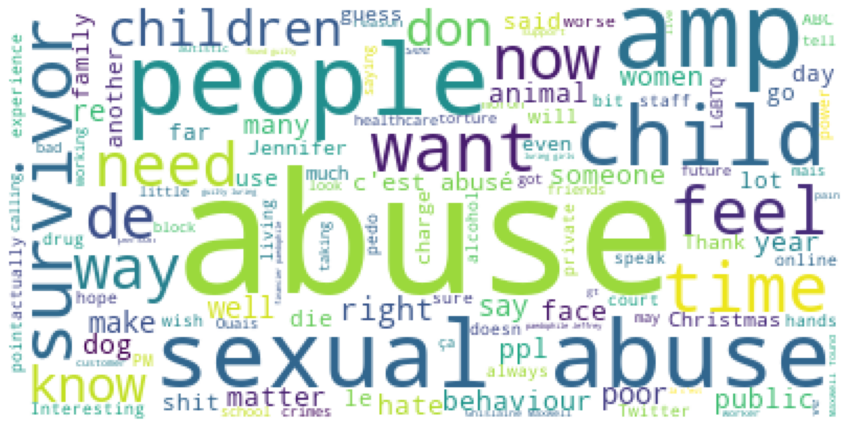

In [ ]:
final_text = ' '.join(final_cleaning_sentences)

cloud = WordCloud(background_color="white")
cloud.generate(final_text)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');
plt.savefig("#path")

In [ ]:
df.to_csv('Tweets_with_Labels.csv')